In [304]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

In [301]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [3]:
df = pd.read_csv("../inputs/LUVOIR-Architecture_A-LBTI_NOMINAL_2-NOMINAL_OCCRATES-observations.csv")

In [5]:
df.head()

,HIP,dist (pc),Type,nexozodis (zodis),Visit #,Visit dt (years),Exp Time (days),Spec char time (days),exoEarth candidate yield,Hot Rocky yield,...,Cold SuperEarth yield,Hot Sub-Neptune yield,Warm Sub-Neptune yield,Cold Sub-Neptune yield,Hot Neptune yield,Warm Neptune yield,Cold Neptune yield,Hot Jupiter yield,Warm Jupiter yield,Cold Jupiter yield
0,54035,2.54686,M2V,1.789080,1,0.0,0.169369,0.013936,0.194687,0.098813,...,0.169113,0.112208,0.196703,0.280737,0.029225,0.068338,0.141802,0.040346,0.093404,0.190763
1,104214,3.49717,K5V,10.232100,1,0.0,0.169658,0.016503,0.191742,0.095114,...,0.172632,0.110423,0.196805,0.286553,0.028926,0.068569,0.144975,0.040621,0.093813,0.193981
2,1599,8.53476,F9V,1.251150,1,0.0,0.138950,0.042277,0.150522,0.135808,...,0.056652,0.115507,0.202857,0.136072,0.029145,0.071506,0.072838,0.039156,0.096930,0.107020
3,61317,8.61105,G0V,2.565680,1,0.0,0.148993,0.049163,0.149340,0.132122,...,0.057140,0.115756,0.202704,0.137291,0.029264,0.071539,0.073725,0.039329,0.096988,0.108204
4,3821,5.83819,G0VSB,0.732871,1,0.0,0.100513,0.010138,0.098687,0.238550,...,0.022516,0.196616,0.169334,0.042736,0.043964,0.064643,0.024719,0.050900,0.089370,0.043513


In [7]:
df.columns

Index([u'HIP', u'dist (pc)', u'Type', u'nexozodis (zodis)', u'Visit #',
       u'Visit dt (years)', u'Exp Time (days)', u'Spec char time (days)',
       u'exoEarth candidate yield', u'Hot Rocky yield', u' Warm Rocky yield',
       u' Cold Rocky yield', u' Hot SuperEarth yield',
       u' Warm SuperEarth yield', u' Cold SuperEarth yield',
       u' Hot Sub-Neptune yield', u' Warm Sub-Neptune yield',
       u' Cold Sub-Neptune yield', u'Hot Neptune yield',
       u' Warm Neptune yield', u' Cold Neptune yield', u' Hot Jupiter yield',
       u' Warm Jupiter yield', u' Cold Jupiter yield'],
      dtype='object')

In [11]:
spec_time = df["Spec char time (days)"].values / df["exoEarth candidate yield"].values

In [125]:
np.random.seed(None)

In [156]:
seed = 1

obs = len(df["HIP"])

deep_time_arr = []
star_arr = []
dist_arr = []
type_arr = []
nezodi_arr = []

np.random.seed(seed)
rands = np.random.rand(obs)

count = 0

for i in range(obs):
    
    # Draw a random number from a uniform distribution between 0-1
    rand = rands[i]
    
    # If the staistical yield exceeds the random number:
    if df["exoEarth candidate yield"].iloc[i] >= rand:
        
        deep_time_arr.append(spec_time[i])
        star_arr.append(df["HIP"].iloc[i])
        dist_arr.append(df["dist (pc)"].iloc[i])
        type_arr.append(df["Type"].iloc[i])
        nezodi_arr.append(df["nexozodis (zodis)"].iloc[i])
        count += 1
        
deep_time_arr = np.array(deep_time_arr)
star_arr = np.array(star_arr)
dist_arr = np.array(dist_arr)
type_arr = np.array(type_arr)
nezodi_arr = np.array(nezodi_arr)

In [157]:
tot_deep_time_arr = np.sum(deep_time_arr)
tot_count_arr = count

In [158]:
print('Total spec. time (days): %.1f' %tot_deep_time_arr)
print('Total num. of spec observations: %i' %tot_count_arr)

Total spec. time (days): 248.8
Total num. of spec observations: 64


**Original Code that I need to match outputs of: **
```python
def read_luvoir_stars(path = os.path.join(HERE, '../inputs/luvoir-A_stars.txt')):
    """
    Read-in file of stars in the biased list from Aki and Chris
    """

    # Read in table of 50 biased draws
    data = np.loadtxt(path, delimiter=',', skiprows=1, dtype = str)

    # Parse
    hip = np.array(data[:,0], dtype=int)
    dist = np.array(data[:,1], dtype=float)
    stype = np.array(data[:,2], dtype=str)

    # Construct dictionary
    dic = {
        "hip" : hip,
        "dist" : dist,
        "stype" : stype
    }

    return dic
```

In [285]:
def gen_biased_catalog(path = "../inputs/LUVOIR-Architecture_A-LBTI_NOMINAL_2-NOMINAL_OCCRATES-observations.csv", 
                       seed = None, architecture = "A"):
    """
    Read in file of observations from Chris Stark's LUVOIR DRM and use it to 
    calculate the biased sample catalog of exo-Earth targets for the LUVOIR habitable 
    exoplanet characterization DRM. 
    
    Parameters
    ----------
    path : str
        Path to nominal occurrence rates file
    seed : int or NoneType
        Seed for random number generator. Defaults to `None` for true randomness. 
        Set to integer for repeatable randomness. 
    architecture : str
        LUVOIR `"A"` or `"B"`
    
    Returns
    -------
    dic : dict
        Dictionary with result:
            `"hip"` : Stellar HIP numbers 
            `"dist"` : Stellar distances 
            `"stype"` : Stellar Types
            `"nez"` : Exo-zodi level 
            `"total count"` : Total targets in sample
            `"total deep time"` : Total deep time (days)
    
    """
    
    # Use pandas to read Chris Stark's observation CSV
    df = pd.read_csv(path)
    
    # Number of observations in CSV
    obs = len(df["HIP"])
    
    # Calculate the actual spectral characterization time for exoEarths
    spec_time = df["Spec char time (days)"].values / df["exoEarth candidate yield"].values
    
    # Find "brightest" targets by sorting spect time
    ibrightest = np.argsort(spec_time)
    
    if architecture == "A":
        # Select all targets for LUVOIR-A
        iuse = ibrightest
    elif architecture == "B":
        # Select the brightest 3/5 of the targets for LUVOIR-B
        iuse = ibrightest[0:int(obs*(3./5.))]
    else:
        print("ERROR: Unknown `architecture` entered")
        
    # Number of observations to actually use
    obs = len(df["HIP"].iloc[iuse])

    # Prep lists to append to
    deep_time_arr = []
    star_arr = []
    dist_arr = []
    type_arr = []
    nezodi_arr = []

    # Set RNG seed
    np.random.seed(seed)
    
    # Draw random numbers from a uniform distribution between 0-1  
    rands = np.random.rand(obs)

    # Start a counting variable
    count = 0

    # Loop over all observations in catalog
    for i in range(obs):

        # Get random number from a uniform distribution between 0-1
        rand = rands[i]

        # If the staistical yield exceeds the random number:
        if df["exoEarth candidate yield"].iloc[iuse].iloc[i] >= rand:

            # Append quantities to lists
            deep_time_arr.append(spec_time[iuse][i])
            star_arr.append(df["HIP"].iloc[iuse].iloc[i])
            dist_arr.append(df["dist (pc)"].iloc[iuse].iloc[i])
            type_arr.append(df["Type"].iloc[iuse].iloc[i])
            nezodi_arr.append(df["nexozodis (zodis)"].iloc[iuse].iloc[i])
            
            # Increment count
            count += 1

    # Convert lists to arrays
    deep_time_arr = np.array(deep_time_arr)
    star_arr = np.array(star_arr)
    dist_arr = np.array(dist_arr)
    type_arr = np.array(type_arr)
    nezodi_arr = np.array(nezodi_arr)
    
    # Total results
    tot_deep_time_arr = np.sum(deep_time_arr)
    tot_count_arr = count
    
    # Construct dictionary to return
    dic = {
        "hip" : star_arr,
        "dist" : dist_arr,
        "stype" : type_arr, 
        "nez" : nezodi_arr, 
        "total count" : count, 
        "total deep time" : tot_deep_time_arr
    }

    return dic

In [286]:
seed = 1

dic = gen_biased_catalog(seed = seed, architecture="A")
print(dic["total count"])
dic = gen_biased_catalog(seed = seed, architecture="B")
print(dic["total count"])

56
39


In [309]:
Ydraw = 500

totcA = np.zeros(Ydraw)
totcB = np.zeros(Ydraw)
tottA = np.zeros(Ydraw)
tottB = np.zeros(Ydraw)

for i in range(Ydraw):
    
    A = gen_biased_catalog(seed = None, architecture="A")
    B = gen_biased_catalog(seed = None, architecture="B")
    
    totcA[i] = A["total count"]
    totcB[i] = B["total count"]
    tottA[i] = A["total deep time"]
    tottB[i] = B["total deep time"]

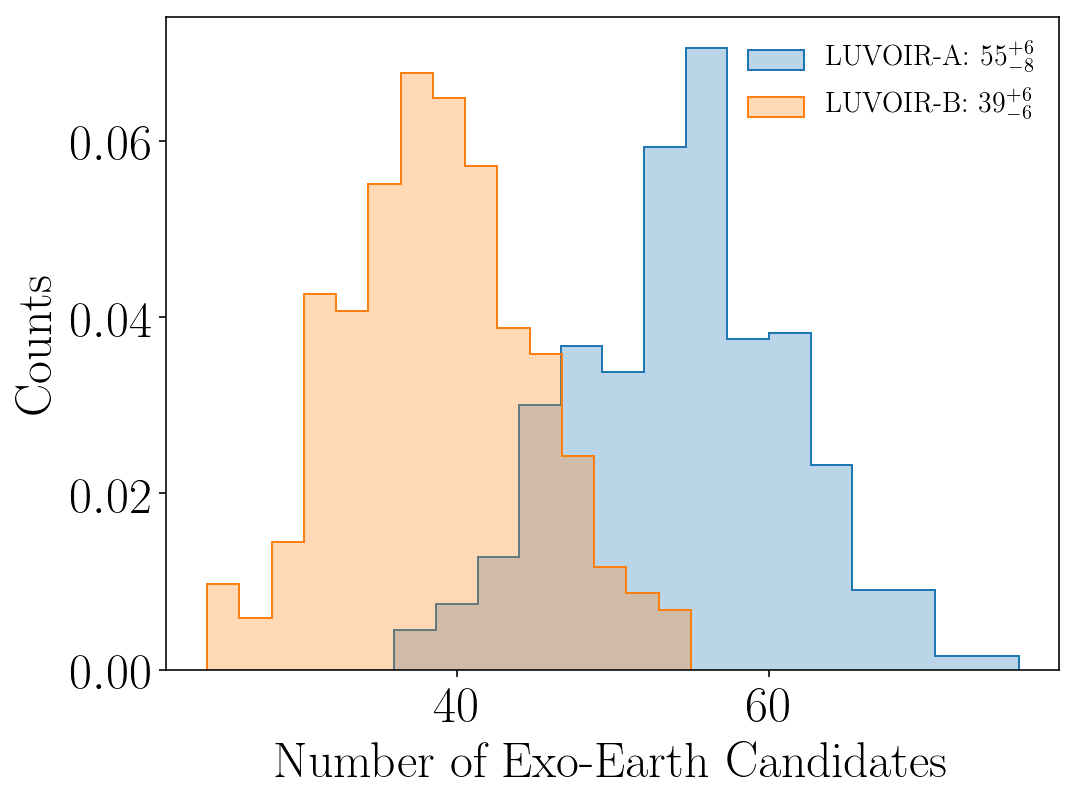

In [306]:
# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Number of Exo-Earth Candidates")
ax.set_ylabel("Counts")
#ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(drmx.Ndraw)/float(drmx.NBIAS), drmx.Ndraw, drmx.NBIAS))

labels = []
handles = []
bins = 15
    
label = "LUVOIR-A"
color = "C0"
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(totcA)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(totcA, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(totcA, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s" %result)

label = "LUVOIR-B"
color = "C1"
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(totcB)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(totcB, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(totcB, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s" %result)

#ax.set_xscale("log")
ax.legend(handles, labels, fontsize = 14, framealpha = 0.0)

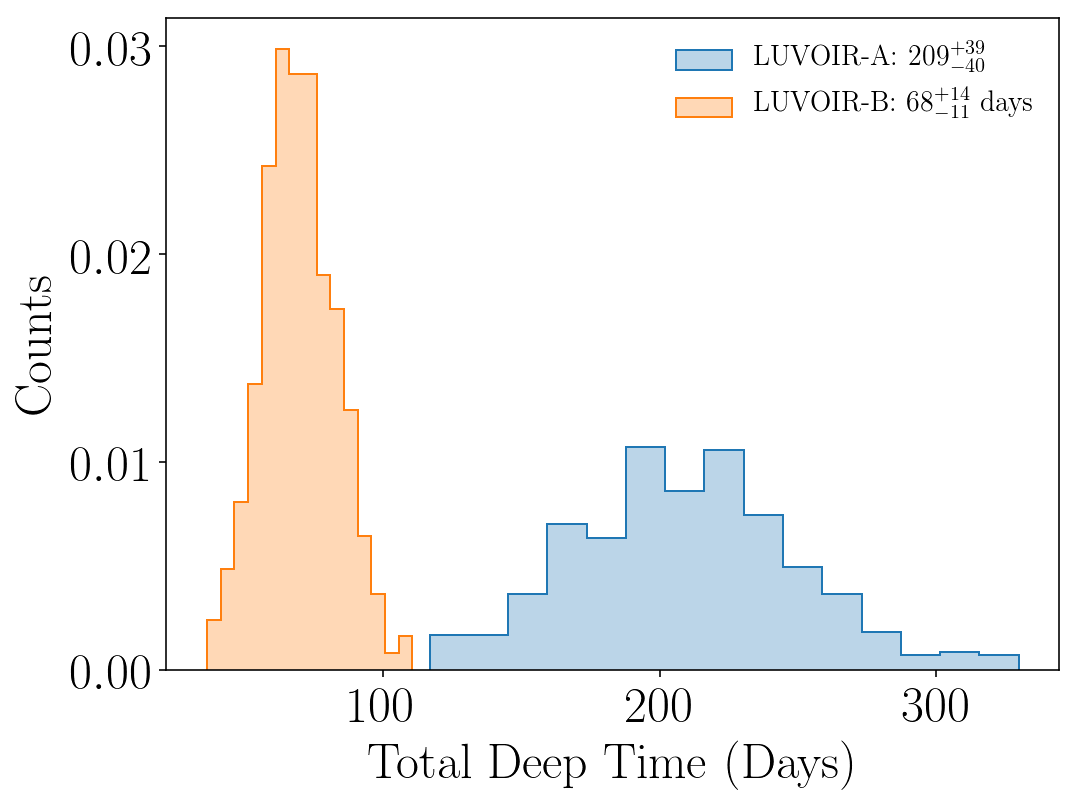

In [307]:
# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Total Deep Time (Days)")
ax.set_ylabel("Counts")
#ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(drmx.Ndraw)/float(drmx.NBIAS), drmx.Ndraw, drmx.NBIAS))

labels = []
handles = []
bins = 15
    
label = "LUVOIR-A"
color = "C0"
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tottA)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(tottA, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(tottA, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s" %result)

label = "LUVOIR-B"
color = "C1"
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tottB)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(tottB, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(tottB, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s days" %result)

#ax.set_xscale("log")
ax.legend(handles, labels, fontsize = 14, framealpha = 0.0)

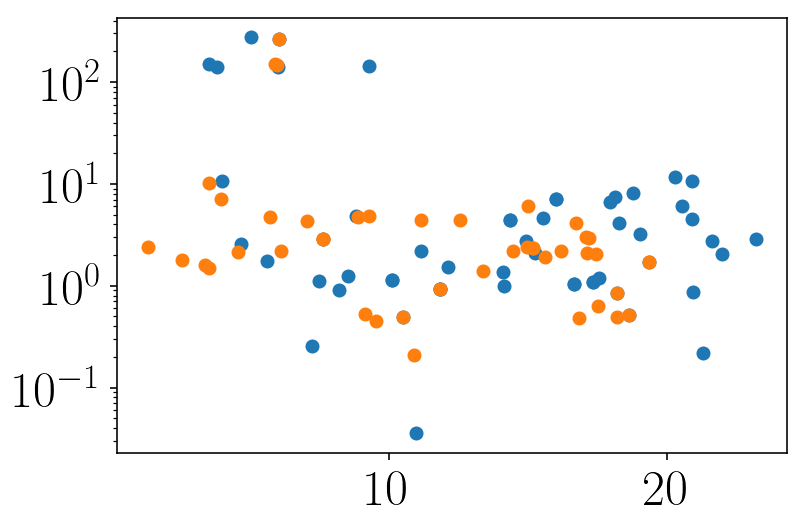

In [314]:
plt.plot(A["dist"], A["nez"], "o")
plt.plot(B["dist"], B["nez"], "o")
plt.yscale("log")

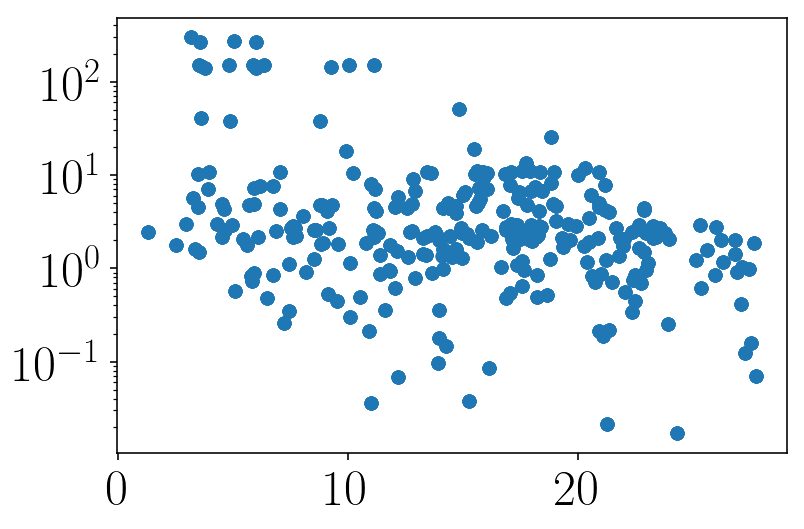

In [315]:
plt.plot(df["dist (pc)"], df["nexozodis (zodis)"], "o")
plt.yscale("log")

In [321]:
df.head(n=40)

,HIP,dist (pc),Type,nexozodis (zodis),Visit #,Visit dt (years),Exp Time (days),Spec char time (days),exoEarth candidate yield,Hot Rocky yield,...,Cold SuperEarth yield,Hot Sub-Neptune yield,Warm Sub-Neptune yield,Cold Sub-Neptune yield,Hot Neptune yield,Warm Neptune yield,Cold Neptune yield,Hot Jupiter yield,Warm Jupiter yield,Cold Jupiter yield
0,54035,2.54686,M2V,1.789080,1,0.0,0.169369,0.013936,0.194687,0.098813,...,0.169113,0.112208,0.196703,0.280737,0.029225,0.068338,0.141802,0.040346,0.093404,0.190763
1,104214,3.49717,K5V,10.232100,1,0.0,0.169658,0.016503,0.191742,0.095114,...,0.172632,0.110423,0.196805,0.286553,0.028926,0.068569,0.144975,0.040621,0.093813,0.193981
2,1599,8.53476,F9V,1.251150,1,0.0,0.138950,0.042277,0.150522,0.135808,...,0.056652,0.115507,0.202857,0.136072,0.029145,0.071506,0.072838,0.039156,0.096930,0.107020
3,61317,8.61105,G0V,2.565680,1,0.0,0.148993,0.049163,0.149340,0.132122,...,0.057140,0.115756,0.202704,0.137291,0.029264,0.071539,0.073725,0.039329,0.096988,0.108204
4,3821,5.83819,G0VSB,0.732871,1,0.0,0.100513,0.010138,0.098687,0.238550,...,0.022516,0.196616,0.169334,0.042736,0.043964,0.064643,0.024719,0.050900,0.089370,0.043513
5,104217,3.49472,K7V,4.538560,1,0.0,0.205931,0.015930,0.197849,0.201880,...,0.058575,0.178393,0.211880,0.120540,0.041296,0.073787,0.064311,0.049517,0.099169,0.096893
6,64394,9.18315,G0V,2.702140,1,0.0,0.148977,0.055929,0.141740,0.126220,...,0.053923,0.113541,0.201729,0.133299,0.028684,0.071438,0.072154,0.038684,0.096905,0.106200
7,108870,3.63895,K5V,41.243500,1,0.0,0.201447,0.021426,0.187598,0.157449,...,0.084418,0.160630,0.207648,0.168566,0.038233,0.072478,0.089543,0.047810,0.097859,0.128995
8,114046,3.28711,M2/M3V,5.659070,1,0.0,0.200010,0.014736,0.186070,0.093470,...,0.159613,0.100518,0.195997,0.274334,0.027195,0.068076,0.139128,0.038524,0.093187,0.188586
9,14632,10.50880,G0V,0.497077,1,0.0,0.124158,0.046572,0.112973,0.129672,...,0.035359,0.123719,0.201221,0.089949,0.029709,0.071953,0.052506,0.039245,0.097744,0.081739
